In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
links = df["link"].tolist()

In [18]:
df[df["uuid"] == "2da574f2-5ae7-4d85-9f5b-c2970a315c1c"]

,created,uuid,link,is_duplicate,duplicate_for,is_hard
20,2024-06-01 01:58:01,2da574f2-5ae7-4d85-9f5b-c2970a315c1c,https://s3.ritm.media/yappy-db-duplicates/2da5...,False,NaN,False


In [17]:
df.iloc[210:250]

,created,uuid,link,is_duplicate,duplicate_for,is_hard
210,2024-06-01 22:00:53,22432439-32ab-4809-808e-0196fc9e0641,https://s3.ritm.media/yappy-db-duplicates/2243...,False,NaN,False
211,2024-06-01 22:03:27,d444f2d0-a7cd-4c9b-bc56-8d5ef88ec015,https://s3.ritm.media/yappy-db-duplicates/d444...,False,NaN,True
212,2024-06-01 22:04:03,a18324cf-b2ad-41e2-86b8-e6923c5fdc36,https://s3.ritm.media/yappy-db-duplicates/a183...,True,2da574f2-5ae7-4d85-9f5b-c2970a315c1c,False
213,2024-06-01 22:23:39,34740160-af84-4e2d-bd6d-109f0800783f,https://s3.ritm.media/yappy-db-duplicates/3474...,False,NaN,False
214,2024-06-01 22:34:14,05053fc6-807f-4399-bc78-f0e484469cc8,https://s3.ritm.media/yappy-db-duplicates/0505...,False,NaN,False
215,2024-06-01 22:40:08,41b5d4ba-f540-4a29-a327-28e21114c646,https://s3.ritm.media/yappy-db-duplicates/41b5...,False,NaN,False
216,2024-06-01 22:47:05,0f73b955-862d-46cb-86a7-5fa815365316,https://s3.ritm.media/yappy-db-duplicates/0f73...,False,NaN,False
217,2024-06-01 22:50:24,1a713f01-e2e1-48e8-83f3-2c90938ba197,https://s3.ritm.media/yappy-db-duplicates/1a71...,False,NaN,False
218,2024-06-01 22:56:51,35907a95-5ea8-4fa9-a150-657397138452,https://s3.ritm.media/yappy-db-duplicates/3590...,False,NaN,False
219,2024-06-01 23:06:34,503d57ad-7606-46c6-87be-861a4fbb4e8f,https://s3.ritm.media/yappy-db-duplicates/503d...,False,NaN,False


In [2]:
import os

## скачивание видео

In [3]:
# import pandas as pd
# import requests
# from pathlib import Path
# from concurrent.futures import ThreadPoolExecutor

# def download_video(link, output_dir):
#     """Загружает видео по ссылке и сохраняет его в указанную папку."""

#     filename = link.split('/')[-1]
#     try:
#         response = requests.get(link, stream=True)
#         response.raise_for_status()

#         with open(f'{output_dir}/{filename}', 'wb') as f:
#             for chunk in response.iter_content(chunk_size=1024 * 1024):
#                 if chunk:
#                     f.write(chunk)

#         print(f'Видео {filename} успешно сохранено.')

#     except requests.exceptions.RequestException as e:
#         print(f'Ошибка загрузки видео {filename}: {e}')

# def download_videos(links, output_dir, max_workers=5):
#     """Загружает видео по ссылкам из DataFrame с использованием многопотока.

#     Args:
#         df: DataFrame с колонкой 'link', содержащей ссылки на видео.
#         output_dir: Путь к папке для сохранения видео.
#         max_workers: Максимальное количество потоков (по умолчанию 5).
#     """
    
#     # Создаем папку, если ее нет
#     Path(output_dir).mkdir(parents=True, exist_ok=True)

#     with ThreadPoolExecutor(max_workers=max_workers) as executor:
#         for index, link in enumerate(links):
#             executor.submit(download_video, link, output_dir)


# download_videos(links, 'downloaded_videos')


## подгружаем валидацию

In [4]:
df_train_valid = pd.read_csv("cp_vseros_train_1000.csv", index_col=0)

In [5]:
from glob import glob
downloaded_video_names = glob("downloaded_videos/*")
need_video_path = [f"downloaded_videos/{i}.mp4" for i in df_train_valid["uuid"].tolist()]

len(set(downloaded_video_names) & set(need_video_path)) == len(need_video_path)

True

In [6]:
# !git clone https://github.com/gkordo/s2vs.git
# %pip install -r s2vs/requirements.txt

## используем модельку

In [7]:
import torchvision
import torch
from s2vs.utils import animate, load_video_opencv

In [51]:
device = "cuda"
feat_extractor = torch.hub.load('gkordo/s2vs:main', 'resnet50_LiMAC').eval().to(device)
# sim_model = torch.hub.load('gkordo/s2vs:main', 's2vs_dns').eval().to(device)
sim_model = torch.hub.load('gkordo/s2vs:main', 's2vs_vcdb').eval().to(device)

Using cache found in /tmp/xdg_cache/torch/hub/gkordo_s2vs_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in /tmp/xdg_cache/torch/hub/gkordo_s2vs_main
Downloading: "https://mever.iti.gr/s2vs/weights/s2vs_vcdb.pth" to /tmp/xdg_cache/torch/hub/checkpoints/s2vs_vcdb.pth
100%|██████████| 1.36M/1.36M [00:00<00:00, 4.15MB/s]


In [9]:
def get_feature_for_video(feat_extractor, video_path, device="cuda", return_mean_features=True):
    video_example = torch.FloatTensor(load_video_opencv(video_path, fps=1, resize=256)).to(device)
    model_features = feat_extractor(video_example)
    
    # if return_mean_features:
        # model_features = model_features.mean(axis=0)
    
    del video_example
    return model_features

In [10]:
from s2vs import utils

In [11]:
def load_video(video_path):
    video = load_video_opencv(video_path, fps=1, resize=256)
    return torch.from_numpy(video).to(device)

In [12]:
@torch.no_grad()
def extract_features(feat_ext, video, batch_sz=1024, gpu_id=0, min_len=4):
    with torch.cuda.amp.autocast():
        features = [feat_ext(batch.to(gpu_id)) for batch in utils.batching(video, batch_sz)]
        features = torch.cat(features, 0)
        while features.shape[0] < min_len:
            features = torch.cat([features, features], 0)
    return features

In [13]:
@torch.no_grad()
def calculate_similarities_to_queries(model, queries, target, gpu_id=0, apply_visil=True):
    similarities = []
    batch_sz = 2048
    
    for i, query in enumerate(queries):
        if query.device.type == 'cpu':
            query = query.to(gpu_id)
        sim = []
        for batch in utils.batching(target, batch_sz):
            sim.append(model.calculate_video_similarity(query, batch, apply_visil=not apply_visil))
        sim = torch.mean(torch.cat(sim, 0))
        similarities.append(sim.cpu().numpy())
    return similarities 

In [14]:
video_path = list(downloaded_video_names)[0]
video_tensor = load_video(video_path)
features = extract_features(feat_extractor, video_tensor, 8)

In [117]:
# video_path = list(downloaded_video_names)[0]
# feature_1 = get_feature_for_video(feat_extractor, video_path).to(device)

In [118]:
# # test indexing speed
# for i in tqdm(range(100)):
#     get_feature_for_video(feat_extractor, list(downloaded_video_names)[i]) 

In [119]:
# # batch not working!
# t = [load_video_opencv(downloaded_video_names[0], fps=1, resize=256) for i in range(5)]
# batch_example = torch.FloatTensor(t)
# batch_example = batch_example.to("cuda")
# t = feat_extractor(batch_example)

## индексирование

In [52]:
features_only = False

In [53]:
from tqdm import tqdm

In [54]:
import pickle

In [55]:
vbd = []

for ind, video_path in tqdm(enumerate(need_video_path)):
    video_tensor = load_video(video_path)
    features = extract_features(feat_extractor, video_tensor, 64)
    if not features_only:
        features = sim_model.index_video(features)
    vbd.append((video_path, features))
    

with open("features_only_false_visil.pkl", "wb") as f:
    pickle.dump(vbd, f)

312it [06:09,  1.35s/it][NULL @ 0x558367e9d840] Invalid NAL unit size (0 > 11395).
[NULL @ 0x558367e9d840] missing picture in access unit with size 11399
[h264 @ 0x55835f5be040] Invalid NAL unit size (0 > 11395).
[h264 @ 0x55835f5be040] Error splitting the input into NAL units.
[NULL @ 0x558367e9d840] Invalid NAL unit size (0 > 11898).
[NULL @ 0x558367e9d840] missing picture in access unit with size 11902
[h264 @ 0x55835f4a8a80] Invalid NAL unit size (0 > 11898).
[h264 @ 0x55835f4a8a80] Error splitting the input into NAL units.
[h264 @ 0x55838143cfc0] error while decoding MB 21 28, bytestream -5
[NULL @ 0x558367e9d840] Invalid NAL unit size (0 > 11463).
[NULL @ 0x558367e9d840] missing picture in access unit with size 11467
[h264 @ 0x55837f4cea80] Invalid NAL unit size (0 > 11463).
[h264 @ 0x55837f4cea80] Error splitting the input into NAL units.
[NULL @ 0x558367e9d840] Invalid NAL unit size (0 > 11420).
[NULL @ 0x558367e9d840] missing picture in access unit with size 11424
[h264 @ 0x55

In [56]:
import pickle
vbd = pickle.load(open("features_only_false_visil.pkl", "rb"))
vbd_only_features = [i[1] for i in vbd]

In [57]:
res = calculate_similarities_to_queries(sim_model, vbd_only_features, vbd_only_features[0])
res[:10]

[array(0.24500334, dtype=float32),
 array(0.03393492, dtype=float32),
 array(0.0334711, dtype=float32),
 array(0.03378854, dtype=float32),
 array(0.02417022, dtype=float32),
 array(0.04491382, dtype=float32),
 array(0.02338933, dtype=float32),
 array(0.06267554, dtype=float32),
 array(0.05032273, dtype=float32),
 array(0.03346426, dtype=float32)]

In [58]:
res = calculate_similarities_to_queries(sim_model, vbd_only_features, vbd_only_features[0], apply_visil=False)
res[:10]

[array(0.57095385, dtype=float32),
 array(-0.98947275, dtype=float32),
 array(-0.9877715, dtype=float32),
 array(-0.9306061, dtype=float32),
 array(-0.98706734, dtype=float32),
 array(-0.8727017, dtype=float32),
 array(-0.99329174, dtype=float32),
 array(-0.76310265, dtype=float32),
 array(-0.94187105, dtype=float32),
 array(-0.9908284, dtype=float32)]

In [59]:
import numpy as np
np.mean(res)

-0.94206166

In [60]:
preds = []
for i in tqdm(range(1, 1000)):
    video = df_train_valid.iloc[i]['uuid']
    duplicate_for = df_train_valid.iloc[i]['duplicate_for']
    video_path = os.path.join("downloaded_videos", video+'.mp4')
    
    target_embedding = vbd_only_features[i]
    queries_embeddings = vbd_only_features[:i]
    sims = calculate_similarities_to_queries(sim_model, queries_embeddings, target_embedding, apply_visil=features_only)

    max_sim = max(sims)
    most_similar_video = np.argmax(sims)
    
    pred = {'sim': max_sim, 'uuid': df_train_valid.iloc[most_similar_video]["uuid"]}
    preds.append(pred)
    
preds = pd.DataFrame(preds)
preds

100%|██████████| 999/999 [06:00<00:00,  2.77it/s]


,sim,uuid
0,-0.9834156,23fac2f2-7f00-48cb-b3ac-aac8caa3b6b4
1,-0.9822868,23fac2f2-7f00-48cb-b3ac-aac8caa3b6b4
2,-0.92092645,4182b2d2-4264-41dd-b101-4c1c66f4bdab
3,-0.9199703,4b1acc2d-69aa-4161-9fc3-fb706ebc9d4a
4,-0.9127227,4b1acc2d-69aa-4161-9fc3-fb706ebc9d4a
...,...,...
994,0.9801586,17526f87-b1ef-47ce-86b4-ee1b9be86ae6
995,-0.7895439,4a5c0c4c-91e6-4f3b-8dbb-5406dff0bc30
996,0.97810143,39b0c2a2-5d4e-4e1a-98e5-fd0b68e8655e
997,-0.83963424,d7009e84-c4fd-4591-abcb-124332e1746d


<Axes: >

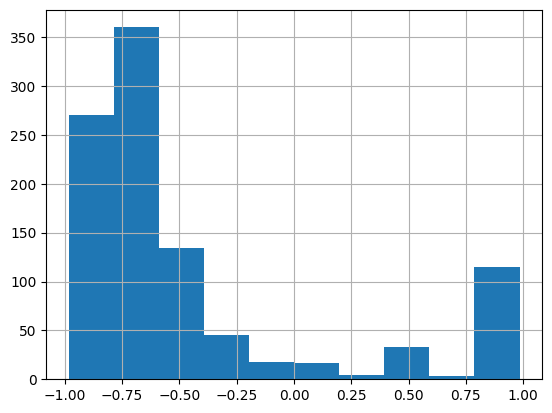

In [61]:
preds["sim"].hist()

In [62]:
preds["sim"].mean()

-0.43411548144824513

In [63]:
t = np.quantile(preds['sim'], 0.83)
t

0.02849608398973932

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [65]:
t = 0.25

In [66]:
preds['is_duplicate'] = preds['sim'].apply(lambda x: (x > t))
preds.loc[preds['sim'] <= t, 'uuid'] = np.nan

accuracy_score(df_train_valid.iloc[1:]['is_duplicate'], preds['is_duplicate'])

0.978978978978979

In [67]:
f1_score(df_train_valid.iloc[1:]['is_duplicate'], preds['is_duplicate'])

0.9345794392523364

In [50]:
confusion_matrix(df_train_valid.iloc[1:]['is_duplicate'], preds['is_duplicate'])

array([[826,   5],
       [ 18, 150]])

In [59]:
import copy
index_embeddings = copy.deepcopy(vbd)

In [60]:
from torch.nn.functional import cosine_similarity

def similarity(tensor1, tensor2):
    tensor1_flat = tensor1.view(-1)
    tensor2_flat = tensor2.view(-1)
    return cosine_similarity(tensor1_flat.unsqueeze(0), tensor2_flat.unsqueeze(0))

In [61]:
video_path

'downloaded_videos/1d188cb4-48f2-4e41-b365-c1122b96ea13.mp4'

In [62]:
preds = []
for i in tqdm(range(1, 1000)):

    video = df_train_valid.iloc[i]['uuid']
    duplicate_for = df_train_valid.iloc[i]['duplicate_for']
    video_path = os.path.join("downloaded_videos", video+'.mp4')
    
    _, query_embedding = index_embeddings[i]

    max_sim = float('-inf')
    most_similar_video = None
    
    for index, (_, index_embedding) in enumerate(index_embeddings[:i]):
        sim = similarity(query_embedding, index_embedding)
        if sim > max_sim:
            max_sim = sim
            most_similar_video = index
    
    pred = {'sim': max_sim.item(), 'uuid': df_train_valid.iloc[most_similar_video]["uuid"]}
    preds.append(pred)
preds = pd.DataFrame(preds)
preds

100%|██████████| 999/999 [00:50<00:00, 19.66it/s] 


,sim,uuid
0,0.974208,23fac2f2-7f00-48cb-b3ac-aac8caa3b6b4
1,0.978275,23fac2f2-7f00-48cb-b3ac-aac8caa3b6b4
2,0.980995,4182b2d2-4264-41dd-b101-4c1c66f4bdab
3,0.984493,0d0558ec-e417-4255-b1cd-a8ed7f4892b9
4,0.985474,0d0558ec-e417-4255-b1cd-a8ed7f4892b9
...,...,...
994,0.999795,17526f87-b1ef-47ce-86b4-ee1b9be86ae6
995,0.960794,0c4c4fea-cb8e-43ac-994a-9c3d09215709
996,0.999371,39b0c2a2-5d4e-4e1a-98e5-fd0b68e8655e
997,0.996967,4c9bd8a3-b6cd-449e-af1b-1c8a41306c56


In [64]:
import numpy as np

In [70]:
preds["sim"].mean()

0.9902036036099041

In [65]:
t = np.quantile(preds['sim'], 0.83)
t

0.9972531223297119

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
preds['is_duplicate'] = preds['sim'].apply(lambda x: (x > t))
preds.loc[preds['sim'] <= t, 'uuid'] = np.nan

accuracy_score(df_train_valid.iloc[1:]['is_duplicate'], preds['is_duplicate'])

0.8818818818818819

In [94]:
np.where(df_train_valid.iloc[1:]["is_duplicate"].values != preds["is_duplicate"])

(array([ 61,  69,  82, 116, 177, 204, 213, 231, 235, 238, 254, 290, 296,
        297, 311, 325, 326, 328, 331, 336, 354, 355, 368, 372, 383, 384,
        392, 407, 419, 421, 432, 433, 436, 443, 448, 450, 461, 473, 498,
        501, 508, 509, 513, 514, 533, 540, 562, 564, 576, 578, 579, 585,
        601, 605, 606, 607, 615, 618, 627, 629, 637, 643, 666, 671, 685,
        686, 687, 691, 693, 696, 697, 701, 703, 707, 713, 717, 718, 723,
        742, 744, 749, 770, 773, 776, 807, 815, 822, 833, 840, 841, 844,
        846, 857, 872, 875, 877, 878, 892, 893, 901, 902, 906, 915, 917,
        922, 923, 928, 945, 954, 957, 960, 964, 965, 979, 984, 985, 989,
        993]),)

In [99]:
df_train_valid.iloc[1:].iloc[213]

created                                        2024-06-04 01:48:27
uuid                          0759a923-daf7-453e-afa5-c0343fe34a6c
link             https://s3.ritm.media/yappy-db-duplicates/0759...
is_duplicate                                                 False
duplicate_for                                                  NaN
is_hard                                                      False
Name: 800, dtype: object

In [100]:
preds.iloc[213]

sim                                         0.998076
uuid            0e7380c6-4f67-4f50-abe3-f40f5d5aeac7
is_duplicate                                    True
Name: 213, dtype: object

In [73]:
confusion_matrix(df_train_valid.iloc[1:]['is_duplicate'], preds['is_duplicate'])

array([[771,  60],
       [ 58, 110]])

## check by model simularity

In [ ]:
preds = []
for i in tqdm(range(1, 1000)):
    video = df_train_valid.iloc[i]['uuid']
    duplicate_for = df_train_valid.iloc[i]['duplicate_for']
    video_path = os.path.join("downloaded_videos", video+'.mp4')
    
    _, query_embedding = index_embeddings[i]

    max_sim = float('-inf')
    most_similar_video = None
    
    for index, (_, index_embedding) in enumerate(index_embeddings[:i]):
        sim = similarity(query_embedding, index_embedding)
        if sim > max_sim:
            max_sim = sim
            most_similar_video = index
    
    pred = {'sim': max_sim.item(), 'uuid': df_train_valid.iloc[most_similar_video]["uuid"]}
    
    preds.append(pred)
preds = pd.DataFrame(preds)
preds